# Manipulating an image using the SVD

First install the necessary image manipulation packages and load them:

In [ ]:
using Images, Colors, ImageCore

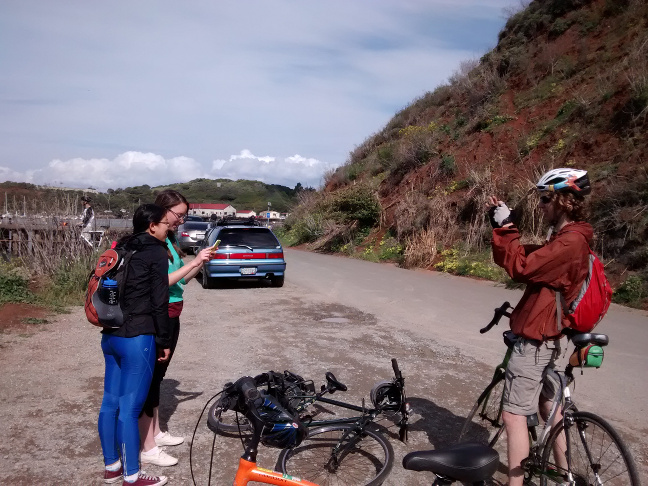

In [69]:
img = load("test.jpg")

Load in your favorite image using the `load` command and give the resulting object a name, say `img`. Convert the resulting object to a 3D array of floating point numbers using

In [70]:
data = float(Array(channelview(img)))

dataT = Array{Float32,3}(size(data)[1], size(data)[3], size(data)[2])
for i in 1:3
    dataT[i,:,:] = rotr90(data[i,:,:])
end

Here, `channelview` separates out the $3$ channels (colors) of the image.

Write a routine to calculate the rank-$k$ approximation using the SVD for each channel. Using `@manipulate` with 3 sliders for the three separate channels, manipulate the resulting approximate image. Which values of $k$ are sufficient to reproduce the image? Note that you can display the image using

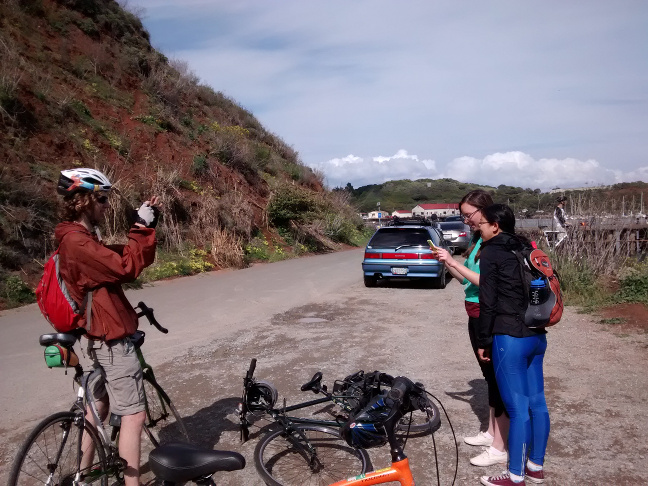

In [71]:
colorview(RGB, dataT)

where `x`, `y` and `z` are the pixel matrices for each channel.

In [77]:
using Interact

Interact.Slider{Int64}(Signal{Int64}(100, nactions=0),"r_k",100,1:200,"d",true)

Interact.Slider{Int64}(Signal{Int64}(100, nactions=0),"g_k",100,1:200,"d",true)

Interact.Slider{Int64}(Signal{Int64}(100, nactions=0),"b_k",100,1:200,"d",true)

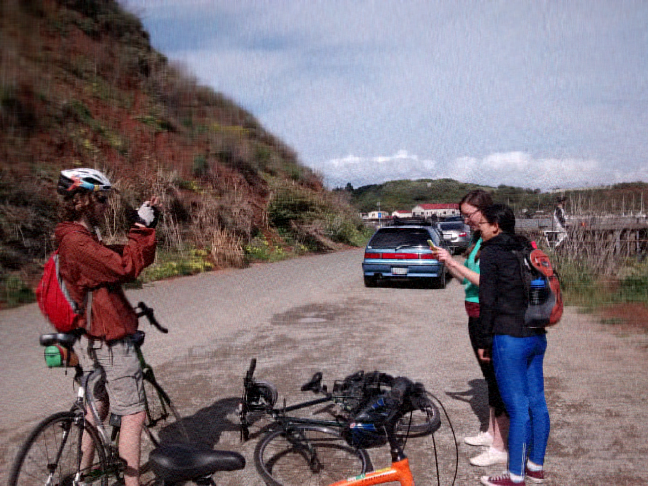

In [84]:
newdata = Array{Float32, 3}(size(dataT)...)

@manipulate for r_k=1:200, g_k=1:200, b_k=1:200
    u, s, v = svd(dataT[1,:,:])
    newdata[1,:,:] = u[:,1:r_k] * diagm(s[1:r_k]) * v'[1:r_k,:]
    u, s, v = svd(dataT[2,:,:])
    newdata[2,:,:] = u[:,1:g_k] * diagm(s[1:g_k]) * v'[1:g_k,:]
    u, s, v = svd(dataT[3,:,:])
    newdata[3,:,:] = u[:,1:b_k] * diagm(s[1:b_k]) * v'[1:b_k,:]
    
    colorview(RGB, newdata)
end

`begin Ned`

With 30/130/13 RGB dimensions I get the reasonable image above. That's about a compression ratio of 0.75, comparable to the JPEG below but clearly lower quality, with a tendency towards smearing into vertical/horizontal lines and losing detail on edges and in shadow.

`end Ned`

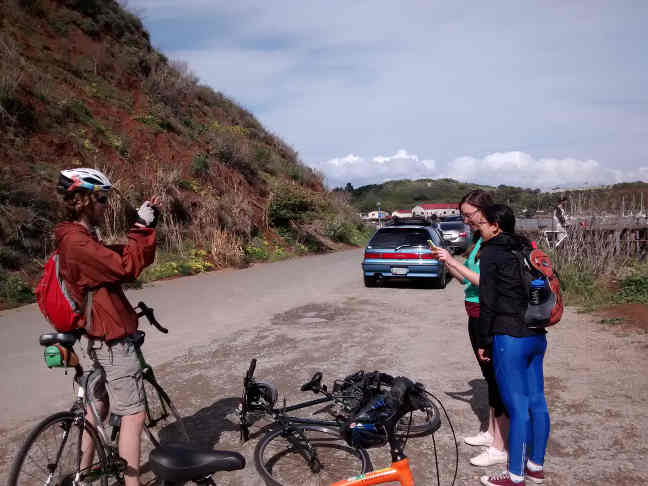

In [88]:
img = load("test_jpeg.jpg")
data = float(Array(channelview(img)))

dataT = Array{Float32,3}(size(data)[1], size(data)[3], size(data)[2])
for i in 1:3
    dataT[i,:,:] = rotr90(data[i,:,:])
end

colorview(RGB, dataT)